# Library Imports for Data Processing and Machine Learning

In this code block, we import the essential libraries and modules needed for various tasks in data analysis and machine learning:

* NumPy and Pandas for efficient data manipulation and numerical operations,
* Seaborn and Matplotlib for creating data visualizations,
* Missingno for handling missing data visualizations,
* Datetime to work with date objects,
* Scikit-learn submodules for tasks such as model accuracy scoring, train-test data splitting, detecting outliers, and scaling/encoding features.
These imports will help streamline our data analysis workflow.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
# !pip install missingno
import missingno as msno
from datetime import date
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler

# Loading the Dataset

In [2]:
df=pd.read_csv("/kaggle/input/twitter-entity-sentiment-analysis/twitter_training.csv")

In [3]:
df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


# Renaming and Selecting Relevant Columns

In this step, we rename the columns in the dataset to more meaningful names. The new columns include:

* Tweet ID: A unique identifier for each tweet.
* Entity: The entity or subject being discussed in the tweet.
* Sentiment: The sentiment associated with the tweet (e.g., Positive, Negative, Neutral).
* Tweet Content: The actual content or text of the tweet.

This renaming helps improve readability and ensures easier manipulation of the data for further analysis.

In [4]:
df["Tweet ID"]=df["2401"]
df["entity"]=df["Borderlands"]
df["sentiment"]=df["Positive"]
df["Tweet content"]=df["im getting on borderlands and i will murder you all ,"]

In [5]:
df.drop(['2401', 'Borderlands','Positive','im getting on borderlands and i will murder you all ,'], axis=1,inplace=True)

In [6]:
df.isnull().sum()

Tweet ID           0
entity             0
sentiment          0
Tweet content    686
dtype: int64

# Removing Missing Data

In [7]:
df.dropna(inplace=True)

In [8]:
df.isnull().sum()

Tweet ID         0
entity           0
sentiment        0
Tweet content    0
dtype: int64

# Visualizing Sentiment Distribution

In this section, we visualize the distribution of sentiments in the dataset using a count plot. The plot displays the number of reviews categorized as positive or negative.

* The x-axis represents the sentiment categories, while the y-axis shows the count of reviews for each category.

Additionally, we calculate and print the percentage distribution of sentiments in the dataset using the value_counts() function, normalized to reflect proportions. This information provides insights into the overall sentiment trends present in the data.

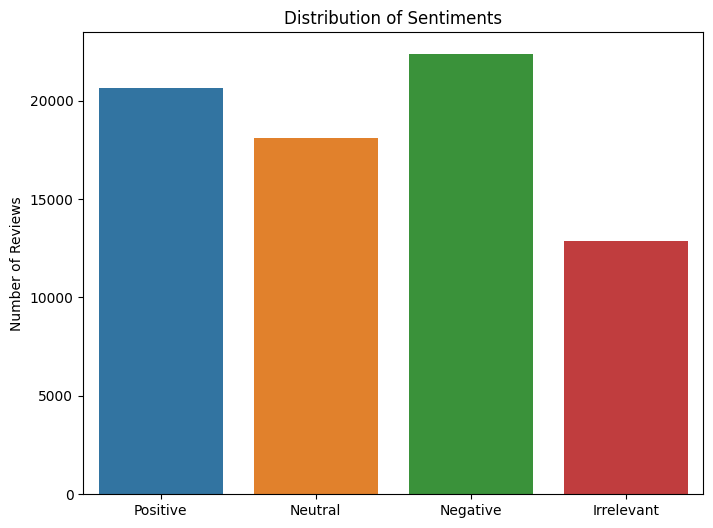

sentiment
Negative      30.215555
Positive      27.912697
Neutral       24.471924
Irrelevant    17.399824
Name: proportion, dtype: float64


In [9]:
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=df) 
plt.title('Distribution of Sentiments')
plt.xlabel('')
plt.ylabel('Number of Reviews')
plt.show()

distribution = df['sentiment'].value_counts(normalize=True) * 100  
print(distribution)

In [10]:
df["Tweet content"][0]

'I am coming to the borders and I will kill you all,'

# Text Cleaning and Preprocessing



In [11]:
import gensim
from gensim.models import Word2Vec
import nltk
from nltk.corpus import stopwords
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


stop_words = stop_words = set([
    'i','twitter','https', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", 
    "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 
    'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 
    'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 
    'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 
    'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 
    'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 
    'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 
    'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 
    'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 
    'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 
    'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 
    'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 
    'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 
    'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 
    'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', 
    "won't", 'wouldn', "wouldn't"
])


def clean_text(text):
    text = re.sub(r'\W', ' ', str(text))  
    text = text.lower()  
    text = text.split()  
    text = [word for word in text if word not in stop_words]
    text = ' '.join(text)
    return text


df['cleaned_text'] = df['Tweet content'].apply(clean_text)

In [12]:
df['cleaned_text'][0]

'coming borders kill'

In [13]:
positive_reviews = df[df['sentiment'] == 'Positive']['cleaned_text']
neutral_reviews = df[df['sentiment'] == 'Neutral']['cleaned_text']
negative_reviews = df[df['sentiment'] == 'Negative']['cleaned_text']
irrelevant_reviews = df[df['sentiment'] == 'Irrelevant']['cleaned_text']

# Generating Word Clouds for Each Sentiment

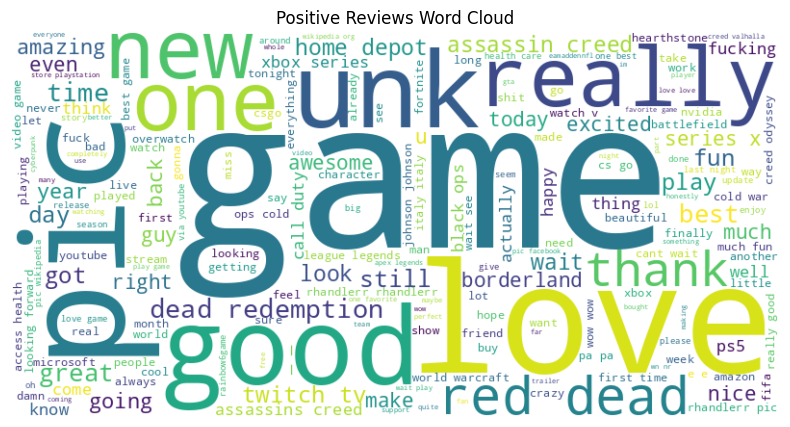

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def create_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

create_wordcloud(positive_reviews, "Positive Reviews Word Cloud")

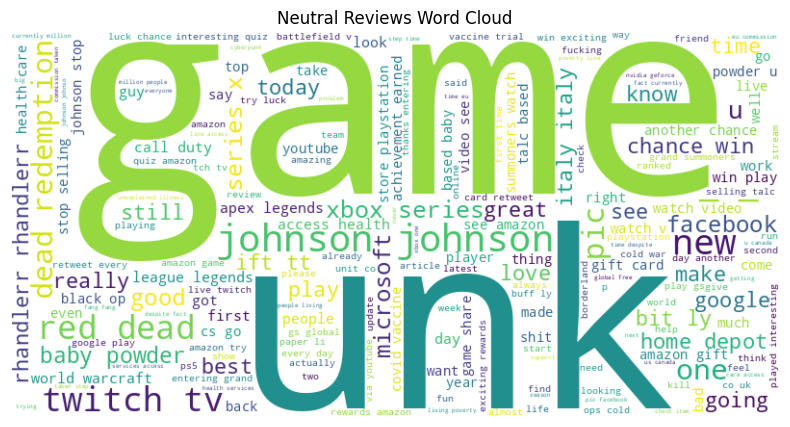

In [15]:
create_wordcloud(neutral_reviews, "Neutral Reviews Word Cloud")

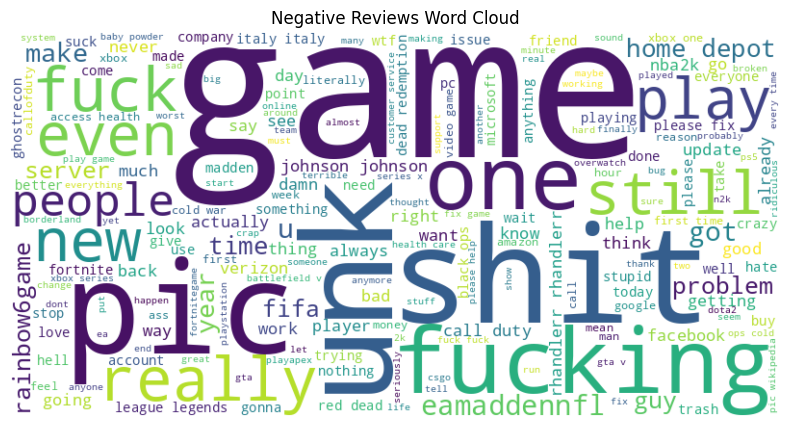

In [16]:
create_wordcloud(negative_reviews, "Negative Reviews Word Cloud")

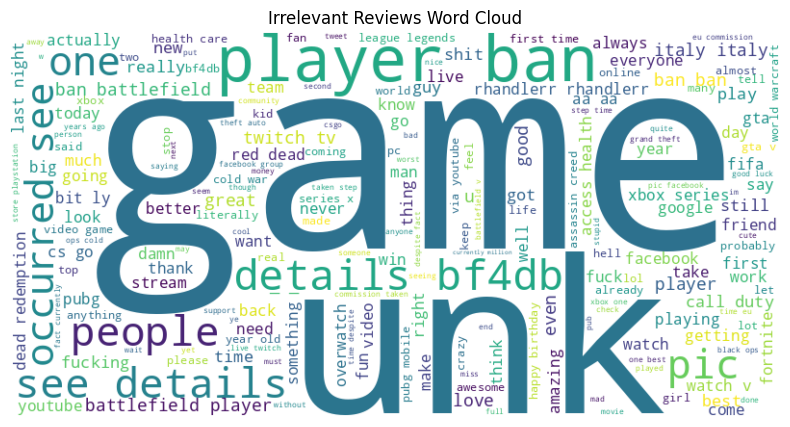

In [17]:
create_wordcloud(irrelevant_reviews, "Irrelevant Reviews Word Cloud")

# Training a Word2Vec Model

In [18]:
sentences = [text.split() for text in df['cleaned_text']]

word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

word2vec_model.wv.most_similar('bad') 

[('sad', 0.9033304452896118),
 ('inadequate', 0.8605284690856934),
 ('terrible', 0.8416652679443359),
 ('like', 0.8387760519981384),
 ('gooft', 0.8370936512947083),
 ('miserable', 0.8260395526885986),
 ('ik', 0.823885977268219),
 ('sometimes', 0.818303108215332),
 ('actually', 0.8162209391593933),
 ('boring', 0.8110977411270142)]

In [19]:
def get_review_vector(review, model):
    words = review.split()
    word_vectors = [model.wv[word] for word in words if word in model.wv]
    if len(word_vectors) == 0:
        return np.zeros(model.vector_size)
    else:
        return np.mean(word_vectors, axis=0)

df['review_vector'] = df['cleaned_text'].apply(lambda x: get_review_vector(x, word2vec_model))

# Preparing Data for Model Training

In this section, we prepare the data for training machine learning models by performing the following steps:

Feature and Target Variables:

* X: We create a NumPy array from the review_vector column, which contains the vector representations of the reviews.
* y: We define the target variable as the sentiment column.
* Label Encoding: We use LabelEncoder from Scikit-learn to convert the categorical sentiment labels into numerical format, facilitating their use in machine learning models.

* Train-Test Split: We split the dataset into training and testing sets using the train_test_split function, with 80% of the data allocated for training and 20% for testing. The random_state=42 ensures reproducibility of the split.

In [20]:
X = np.array(df['review_vector'].tolist())
y = df['sentiment']  

# Label encoding
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = LogisticRegression(max_iter=1000)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy:.2f}')

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Model Accuracy: 0.52
Confusion Matrix:
 [[ 488  773  582  781]
 [ 264 3030  542  627]
 [ 260  816 1782  731]
 [ 286  750  653 2434]]


# Visualizing the Confusion Matrix

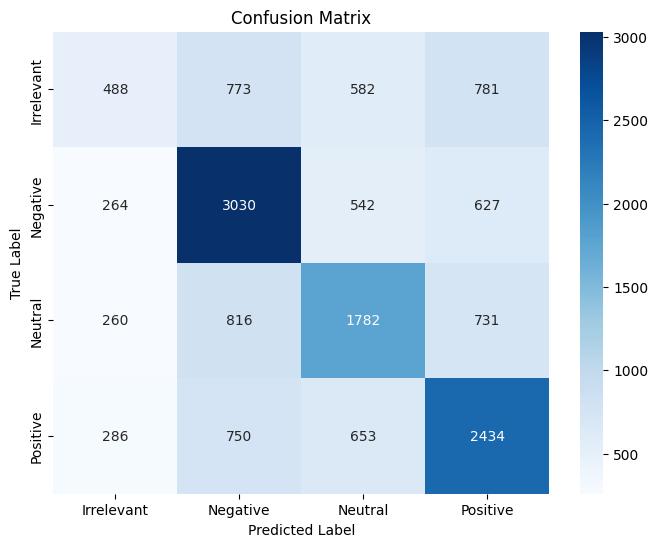

In [22]:
conf_matrix = confusion_matrix(y_test, y_pred)  

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [23]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.model_selection import GridSearchCV, cross_validate, RandomizedSearchCV, validation_curve

model = RandomForestClassifier(random_state=20)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy:.2f}')

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Model Accuracy: 0.77
Confusion Matrix:
 [[1554  356  248  466]
 [  94 3747  195  427]
 [  86  423 2649  431]
 [ 107  388  233 3395]]


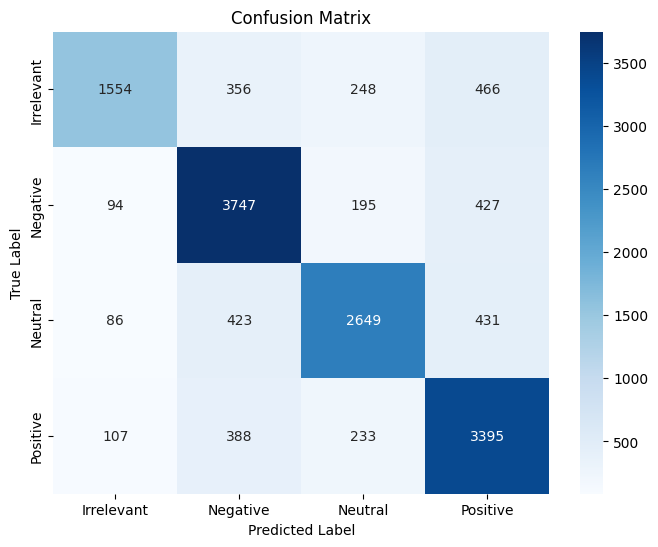

In [24]:
conf_matrix = confusion_matrix(y_test, y_pred)  

# Confusion matrix'i görselleştir
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()